In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification

In [ ]:
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples, n_features=2,
                        n_informative=2, n_redundant=0)
]

In [ ]:
Kernel = ["linear", "poly", "rbf", "sigmoid"]

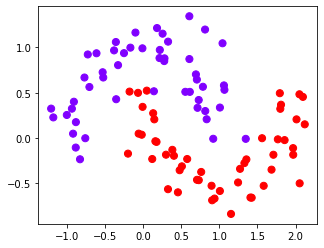

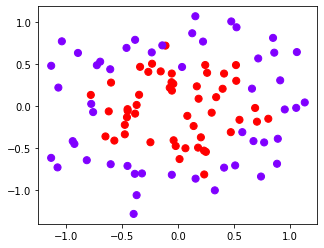

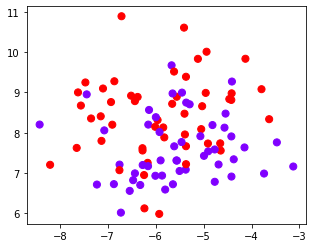

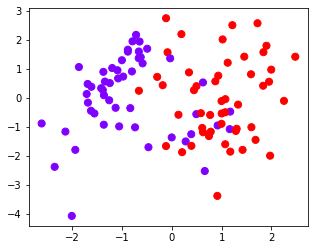

In [4]:
for X, Y in datasets:
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="rainbow")

In [ ]:
nrows = len(datasets)
ncols = len(Kernel) + 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: No contour levels were found within the data range.


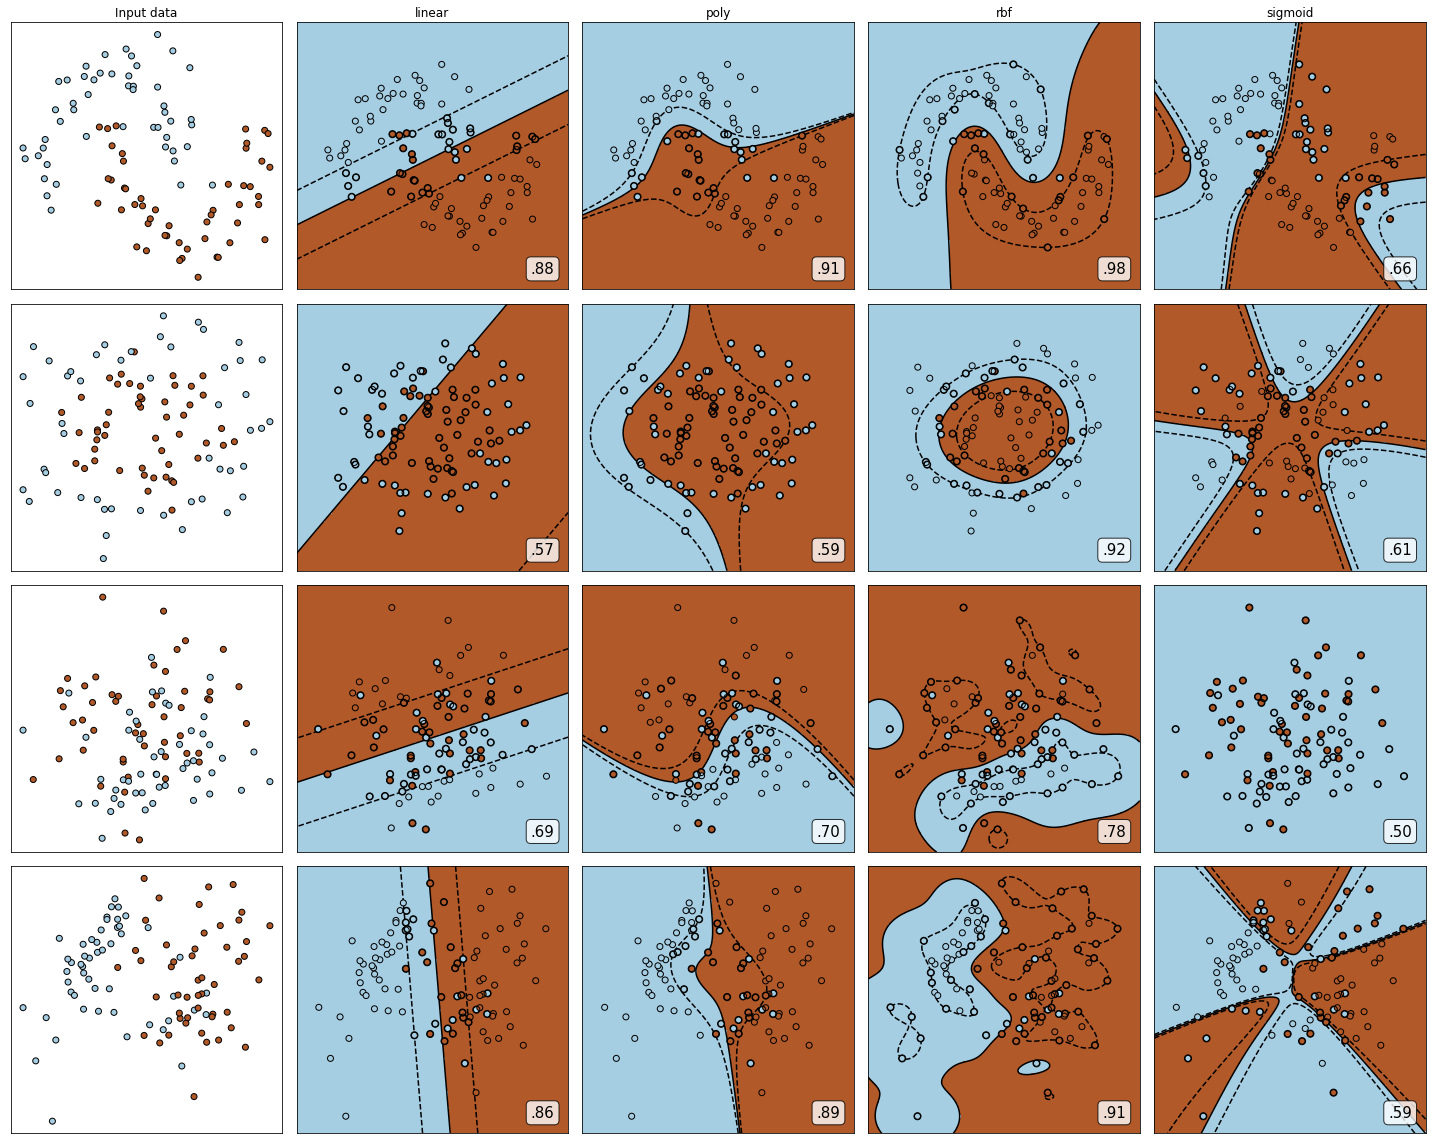

In [13]:
# 在不同的数据集中循环
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16))
for ds_cnt, (X, Y) in enumerate(datasets):
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10,
               cmap=plt.cm.Paired, edgecolors='0')
    ax.set_xticks(())
    ax.set_yticks(())  # 不要显示刻度

    # 在不同的核函数中循环
    for est_idx, kernel in enumerate(Kernel):

        ax = axes[ds_cnt, est_idx+1]
        clf = SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)

        # 绘制点
        ax.scatter(X[:, 0], X[:, 1], c=Y,
                   zorder=10,
                   cmap=plt.cm.Paired, edgecolors='k')
        # 绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                   s=50, facecolors='none', zorder=10, edgecolors='k')  # facecolors表示绘制成透明的
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        # 相当于linsapce和meshgrid的结合，[起始值：结束值：步长]
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

        # 计算所有点到决策边界的距离
        Z = clf.decision_function(
            np.vstack([XX.ravel(), YY.ravel()]).T).reshape(XX.shape)

        # 填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)  # z>0和z<0填上不同的颜色

        # 绘制等高线

        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=[
            '--', '-', '--'], levels=[-1, 0, 1])

        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(kernel)

        # 为每张图添加分类的函数
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0'),
                size=15,
                # 为分数添加一个白色的格子作为底色，透明度0.8
                bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'),
                # 确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                transform=ax.transAxes,
                # 位于坐标轴的什么方向
                horizontalalignment='right')
plt.tight_layout()  # 图像间隔小，因为没有显示横坐标轴和纵坐标轴
plt.show()